# Importamos librerias ... 

In [43]:
import pandas as pd
import datetime
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.calibration import calibration_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import time
from sklearn.ensemble import RandomForestClassifier
import pickle

# Introduccion

En el siguiente notebook vamos a realizar 4 experimentos que nos van a proporcionar un criterio y un argumento solido para la elección de nuestro modelo, en lo cual enfatizaremos en variantes de nuestro conjunto de datos, los cuales consisten en:

- input original.
- input original con PCA 
- input original con balanceo de clases
- input original con PCA + balanceo de clases

Para cada uno vamos a aplicar las respectivas validaciones de 

- Matriz de confusión
- Reporte de clasificación
- Curva de aprendizaje
- Curva de validacion
- Curva de calibración
- Curva ROC
- Feature importance

Donde agregaremos nuestro argumento respecto los resultados y como estos pueden impactar tanto positiva como negativamente en nuestro proyecto.

# Importamos librerias

In [2]:
df = pd.read_csv("input_transformada.csv", sep=';', encoding ="latin-1")
df.head(5)

,GENERO,SEGMENTO_CLIENTE,RECUPERACION,NEGOCIACION_ACTIVA,MARCA_TIPO_CARTERA,PRIORIDAD,EDAD,RIESGO_ACTUAL,MORA_INICIAL,MORA_ACTUAL,...,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS,DESC_ACTIVIDAD_codificado,ACCION_MEJOR_CONTACTO,EFECTO_MEJOR_CONTACTO,ESTADO_ICS_ACTUAL,MOTIVO_NO_PAGO_codificado,SUB_PRODUCTO_codificado,RANGO_HORA
0,1,0,2,0,1,5,23,0,30,0,...,9,1,1,3,3,26,6,2,3,1
1,1,0,2,0,1,5,23,0,30,0,...,9,1,1,3,3,26,6,2,3,0
2,1,0,2,0,1,21,23,0,30,0,...,9,1,1,3,3,26,6,6,3,0
3,1,0,2,0,1,5,23,0,30,0,...,9,1,1,3,3,26,6,2,3,0
4,1,0,2,0,1,5,23,0,30,0,...,9,1,1,3,3,26,6,6,3,1


## Aplicamos sampling

In [3]:
# Crear un nuevo dataframe para cada clase
df_morning = df[df['RANGO_HORA'] == 0]
df_tarde = df[df['RANGO_HORA'] == 1]

min_samples = min(len(df_morning), len(df_tarde))

# Aplicar el subsampling a cada clase
df_morning_subsampled = df_morning.sample(n=min_samples, random_state=42)
df_tarde_subsampled = df_tarde.sample(n=min_samples, random_state=42)

# Concatenar los dataframes de las clases subsampleadas
df_subsampled = pd.concat([df_morning_subsampled, df_tarde_subsampled])
df_subsampled['RANGO_HORA'].value_counts()

RANGO_HORA
0    216920
1    216920
Name: count, dtype: int64

## Dividimos para nuestro conjunto de entrenamiento y pruebas

In [4]:
X = df_subsampled.drop(columns=['RANGO_HORA'])
y = df_subsampled['RANGO_HORA']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Inicializamos modelos a entrenar

In [6]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier()
}

# Entrenamos y evaluamos cada modelo

In [7]:
results = {}
for name, model in models.items():
    start_time = time.time()  # Tomar el tiempo de inicio
    model.fit(X_train, y_train)
    end_time = time.time()  # Tomar el tiempo de finalización
    train_time = end_time - start_time  # Calcular el tiempo de entrenamiento
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1, "Confusion Matrix": cm, "Training Time (s)": train_time}

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Resultados individuales por cada modelo

In [8]:
print("Rendimiento de los modelos:")
for name, metrics in results.items():
    print(f"Modelo: {name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1-score: {metrics['F1-score']}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}\n")

Rendimiento de los modelos:
Modelo: Decision Tree
Accuracy: 0.6036211506546192
Precision: 0.6118190305568872
Recall: 0.5605465137784353
F1-score: 0.5850615898753724
Confusion Matrix:
[[28128 15384]
 [19009 24247]]

Modelo: Random Forest
Accuracy: 0.6059952978056427
Precision: 0.6031294775864814
Recall: 0.6130710190493804
F1-score: 0.6080596159357982
Confusion Matrix:
[[26062 17450]
 [16737 26519]]

Modelo: SVM
Accuracy: 0.5074566660520007
Precision: 0.5062867940984083
Recall: 0.4831237285000925
F1-score: 0.4944341263175328
Confusion Matrix:
[[23133 20379]
 [22358 20898]]

Modelo: Logistic Regression
Accuracy: 0.5132998340401992
Precision: 0.511956927093045
Recall: 0.5077908267061217
F1-score: 0.5098653667595172
Confusion Matrix:
[[22573 20939]
 [21291 21965]]

Modelo: KNN
Accuracy: 0.5745436105476673
Precision: 0.5726697537939571
Recall: 0.5775152579988904
F1-score: 0.5750822993162825
Confusion Matrix:
[[24871 18641]
 [18275 24981]]

Modelo: Naive Bayes
Accuracy: 0.5147058823529411
Pre

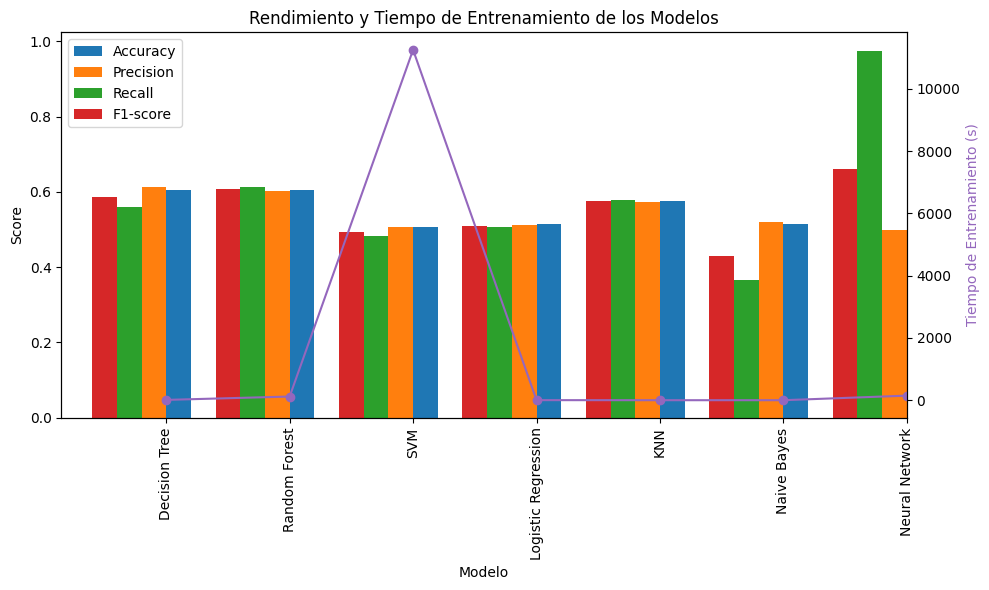

In [32]:
# Definir los colores para cada métrica
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

# Convertir los resultados a DataFrame
results_df = pd.DataFrame(results).T

# Mostrar los resultados de rendimiento de cada modelo en forma de gráfico de barras
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_title('Rendimiento y Tiempo de Entrenamiento de los Modelos')
ax1.set_xlabel('Modelo')
ax1.set_ylabel('Score')

# Trazar las barras para cada métrica con un color diferente
for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1-score']):
    results_df[metric].plot(kind='bar', ax=ax1, color=colors[i], position=i, width=0.2, label=metric)

# Configurar la leyenda
ax1.legend()

# Configurar el segundo eje y (para el tiempo de entrenamiento)
ax2 = ax1.twinx()
ax2.set_ylabel('Tiempo de Entrenamiento (s)', color='tab:purple')
results_df['Training Time (s)'].plot(kind='line', ax=ax2, color='tab:purple', marker='o')

fig.tight_layout()
plt.show()

In [20]:
results_df

,Accuracy,Precision,Recall,F1-score,Confusion Matrix,Training Time (s)
Decision Tree,0.603621,0.611819,0.560547,0.585062,"[[28128, 15384], [19009, 24247]]",10.084164
Random Forest,0.605995,0.603129,0.613071,0.60806,"[[26062, 17450], [16737, 26519]]",118.245242
SVM,0.507457,0.506287,0.483124,0.494434,"[[23133, 20379], [22358, 20898]]",11256.645911
Logistic Regression,0.5133,0.511957,0.507791,0.509865,"[[22573, 20939], [21291, 21965]]",2.309759
KNN,0.574544,0.57267,0.577515,0.575082,"[[24871, 18641], [18275, 24981]]",0.173049
Naive Bayes,0.514706,0.518816,0.365891,0.429137,"[[28833, 14679], [27429, 15827]]",0.230743
Neural Network,0.501049,0.499781,0.974871,0.660796,"[[1306, 42206], [1087, 42169]]",147.150789


# Seleccionar los dos mejores modelos basados en la precisión

In [21]:
top_models = sorted(results, key=lambda x: results[x]["Accuracy"], reverse=True)[:2]
print("Los dos mejores modelos son:", top_models)

Los dos mejores modelos son: ['Random Forest', 'Decision Tree']


# Ajustamos nuestros mejores modelos

In [22]:
best_models = {}
for name in top_models:
    model = models[name]
    model.fit(X_train, y_train)
    best_models[name] = model

# Comparar los dos mejores modelos en el conjunto de prueba

In [23]:
print("\nComparación de los dos mejores modelos en el conjunto de prueba:")
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Modelo: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Confusion Matrix:\n{cm}\n")


Comparación de los dos mejores modelos en el conjunto de prueba:
Modelo: Random Forest
Accuracy: 0.6057302231237323
Precision: 0.603010840849048
Recall: 0.6121000554836323
F1-score: 0.6075214538112065
Confusion Matrix:
[[26081 17431]
 [16779 26477]]

Modelo: Decision Tree
Accuracy: 0.6038055504333395
Precision: 0.6120604790872605
Recall: 0.5605696319585722
F1-score: 0.585184559506715
Confusion Matrix:
[[28143 15369]
 [19008 24248]]



# Seleccionar el modelo individual final basado en el rendimiento en el conjunto de prueba

In [24]:
final_model_name = max(best_models, key=lambda x: accuracy_score(y_test, best_models[x].predict(X_test)))
print(f"El modelo individual final es: {final_model_name}")

El modelo individual final es: Random Forest


In [41]:
# Obtener el modelo Random Forest final
final_model = best_models[final_model_name]

# Imprimir los parámetros del modelo
print("Parámetros del modelo Random Forest:")
print(final_model.get_params())

Parámetros del modelo Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [44]:
# Guardar el modelo en un archivo pickle
filename = 'modelo_random_forest.pkl'
with open(filename, 'wb') as file:
    pickle.dump(final_model, file)

print(f"El modelo ha sido guardado en {filename}")

El modelo ha sido guardado en modelo_random_forest.pkl
